# QPM : Assignement 3

## Librairies

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

## Functions

In [2]:
'''
Function get_multi_timeseries:

Returns the full time series of price metrics (Open, High, Low, Close, Adj Close, Volume, etc.)
for a list of given stock tickers, over a specified time period and interval.

Inputs:
    - list_underlying: list of str ; tickers of the desired stocks.
    - startd / endd: str ; start and end dates (inclusive) defining the time range to retrieve, in format "YYYY-MM-DD" 

Output:
    - DataFrame with:
        - index: pandas Timestamps (dates in ascending order),
        - columns: MultiIndex with first level = metrics (e.g., "Close"), 
                   second level = stock tickers.


Function: annual_mean_returns ; annual_volatility ; sharpe_ratio

Returns the annual mean, return and sharpe ratio of each stocks.

Input: - df: DataFrame (float) ; DataFrame of time series of close price of each stocks.

Output: DataFrame (float) ; 1 column, indexed by the stocks tickers.
'''

def get_multi_timeseries(list_underlying,startd,endd):
    return yf.download(list_underlying,interval="1d",start=startd,end=endd)

def annual_mean_return(df) :
    return df.mean() * 252

def annual_volatility(df) :
    return df.std() * np.sqrt(252)

def sharpe_ratio(df) :
    return annual_mean_return(df) / annual_volatility(df)

## Questions for Assignment 3

#### Q3.1 Prepare the data for this assignment.

Let's import the stocks prices of SP500 companies

In [3]:
URL = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

In [25]:
'''
Assign value to parameters
'''
tickers = pd.read_html(URL)[0]['Symbol'].tolist()
start_date = "2000-01-01"
end_date = "2022-12-31"
raw_market_data=get_multi_timeseries(tickers,start_date,end_date)
close_price_data = raw_market_data.xs("Close",axis = 1) #Extract the Close price for each tickers.
close_price_data.index = pd.to_datetime(close_price_data.index, format = '%Y/%m/%d') #Change index format from Timestamp to DateTime

/var/folders/lr/7kzpljcn0zl52pt8zpscgfj40000gn/T/ipykernel_2275/2863319027.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  return yf.download(list,interval="1d",start=startd,end=endd)
[*********************100%***********************]  502 of 502 completed

7 Failed downloads:
['VLTO', 'KVUE', 'GEV', 'SW', 'SOLV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2022-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 946702800, endDate = 1672462800")')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2000-01-01 -> 2022-12-31)')


Let's clean the historical prices keeping only the ones from 2000-01-01 to 2022-12-31 for companies with enough data

In [29]:
close_price_focus = close_price_data.dropna(axis = 1, how = "all") #drop the columns with only NaN entries
mask = (close_price_focus.isna().sum() <= 100) # drop the company names that have more than 100 missing observations
close_price_focus = close_price_focus.loc[:,mask]
close_price_focus.describe()

Ticker,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WMB,WMT,WRB,WSM,WST,WY,XEL,XOM,YUM,ZBRA
count,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,...,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000,5787.000000
mean,41.962047,28.402888,35.124439,15.822778,117.181149,50.227273,26.065057,62.980589,71.852418,32.123512,...,13.643675,19.643270,11.615153,20.327085,68.789311,16.454026,23.368829,42.942787,40.024357,99.453604
std,35.573140,42.483030,30.684548,12.991039,152.396637,40.380351,16.503054,56.485868,77.145966,20.386817,...,7.418506,10.889359,10.183526,18.089443,99.831150,7.305811,17.906286,16.940730,33.988455,124.255846
min,6.509986,0.197156,6.980702,1.208433,8.317788,10.716373,4.512146,13.011333,4.834496,8.951227,...,0.296817,9.271351,0.569756,1.586851,3.241056,4.141686,2.320535,14.346547,2.907505,15.194444
25%,19.106951,1.573487,13.719815,5.008594,28.400000,22.840269,14.718865,23.526149,24.179016,17.186455,...,7.839882,11.668131,4.892213,9.228345,11.626060,10.360279,10.087435,30.062749,12.205124,31.800000
50%,27.257696,10.735357,19.039425,10.491580,38.919998,30.191576,22.724066,32.672619,39.939999,23.462343,...,12.569794,13.738817,7.516782,13.469354,20.533573,14.003803,15.159496,45.617668,29.157368,44.099998
75%,55.511929,32.897121,40.576530,25.664752,129.599998,67.178604,34.316517,85.836761,86.475002,43.017185,...,18.630043,22.772500,16.683714,24.616426,82.448341,21.824927,34.278753,55.169374,56.610823,101.654999
max,174.417145,178.645660,132.416641,60.496162,688.369995,176.538498,90.189827,254.354324,342.269989,89.207039,...,34.033939,50.998798,47.730030,103.032524,467.231903,37.775898,69.950790,104.856049,129.862137,614.549988


#### Q3.2 Compute log returns

In [15]:
log_returns = (np.log(close_price_focus) - np.log(close_price_focus.shift(1))).iloc[1:,:]
log_returns

,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WMT,WRB,WST,WY,XEL,XOM,XRAY,YUM,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.079464,-0.088077,-0.028987,-0.005450,-0.087618,-0.051914,-0.010472,0.000000,-0.049915,0.000000,...,-0.038136,-0.031253,0.010277,-0.038291,0.022765,-0.019340,0.000000,-0.020306,-0.014533,-0.049635
2000-01-05,-0.064037,0.014527,-0.001841,0.088832,0.019578,0.014493,-0.015915,-0.009661,-0.065064,0.037956,...,-0.020619,-0.016001,-0.004099,0.051618,0.037860,0.053082,0.017139,0.005115,0.018963,-0.001184
2000-01-06,-0.038820,-0.090514,0.034393,-0.010050,0.008130,-0.027718,0.005333,0.013261,-0.062859,-0.003731,...,0.010853,0.056441,-0.010320,0.045717,-0.009332,0.050406,0.001307,-0.008540,-0.055665,0.014118
2000-01-07,0.080042,0.046281,0.010620,0.054067,0.047439,0.027718,0.015831,0.022499,0.112049,0.014843,...,0.072846,-0.015361,0.010320,-0.033436,0.000000,-0.002939,-0.002615,-0.022551,-0.011160,0.002334
2000-01-10,0.058813,-0.017744,-0.007067,0.032944,0.037883,0.083468,0.000000,0.024293,-0.010151,-0.007394,...,-0.018417,-0.009331,0.020326,-0.004368,0.000000,-0.014080,0.023287,0.039558,0.033114,-0.018231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001475,-0.002802,0.001388,0.008397,0.005719,0.000549,0.012014,0.007415,0.000319,0.013154,...,0.002019,0.006419,-0.000553,0.014071,0.012770,0.026101,0.011057,0.000621,0.002864,0.003515
2022-12-27,0.002142,-0.013976,0.003599,0.003779,-0.009977,-0.010060,0.013541,0.000373,-0.009988,0.008342,...,0.000278,0.006243,0.006782,-0.000635,0.008982,0.013798,0.007512,0.007728,0.011137,0.008017
2022-12-28,-0.009811,-0.031166,-0.006839,-0.016163,-0.020380,-0.011908,-0.024166,-0.013281,-0.023848,-0.010019,...,-0.017678,-0.015132,-0.023464,-0.027055,-0.007229,-0.016563,-0.034579,-0.004552,-0.016713,-0.017974


#### Q3.3 Compute the annual mean return, volatility, and Sharpe ratios for these companies in your dataset.

In [16]:
ret = annual_mean_return(log_returns).to_frame(name = "Annual Mean Returns")
vol = annual_volatility(log_returns).to_frame(name = "Volatility")
sharpe = sharpe_ratio(log_returns).to_frame(name = "Sharpe Ratio")
measures = pd.concat([ret, vol, sharpe], axis = 1)
measures

,Annual Mean Returns,Volatility,Sharpe Ratio
A,0.053313,0.414503,0.128619
AAPL,0.218953,0.413076,0.530056
ABT,0.107689,0.244386,0.440650
ACGL,0.169619,0.265364,0.639195
ADBE,0.131927,0.432502,0.305031
...,...,...,...
XOM,0.076302,0.266241,0.286589
XRAY,0.067417,0.277016,0.243369
YUM,0.143102,0.287745,0.497320
ZBRA,0.101340,0.381976,0.265304


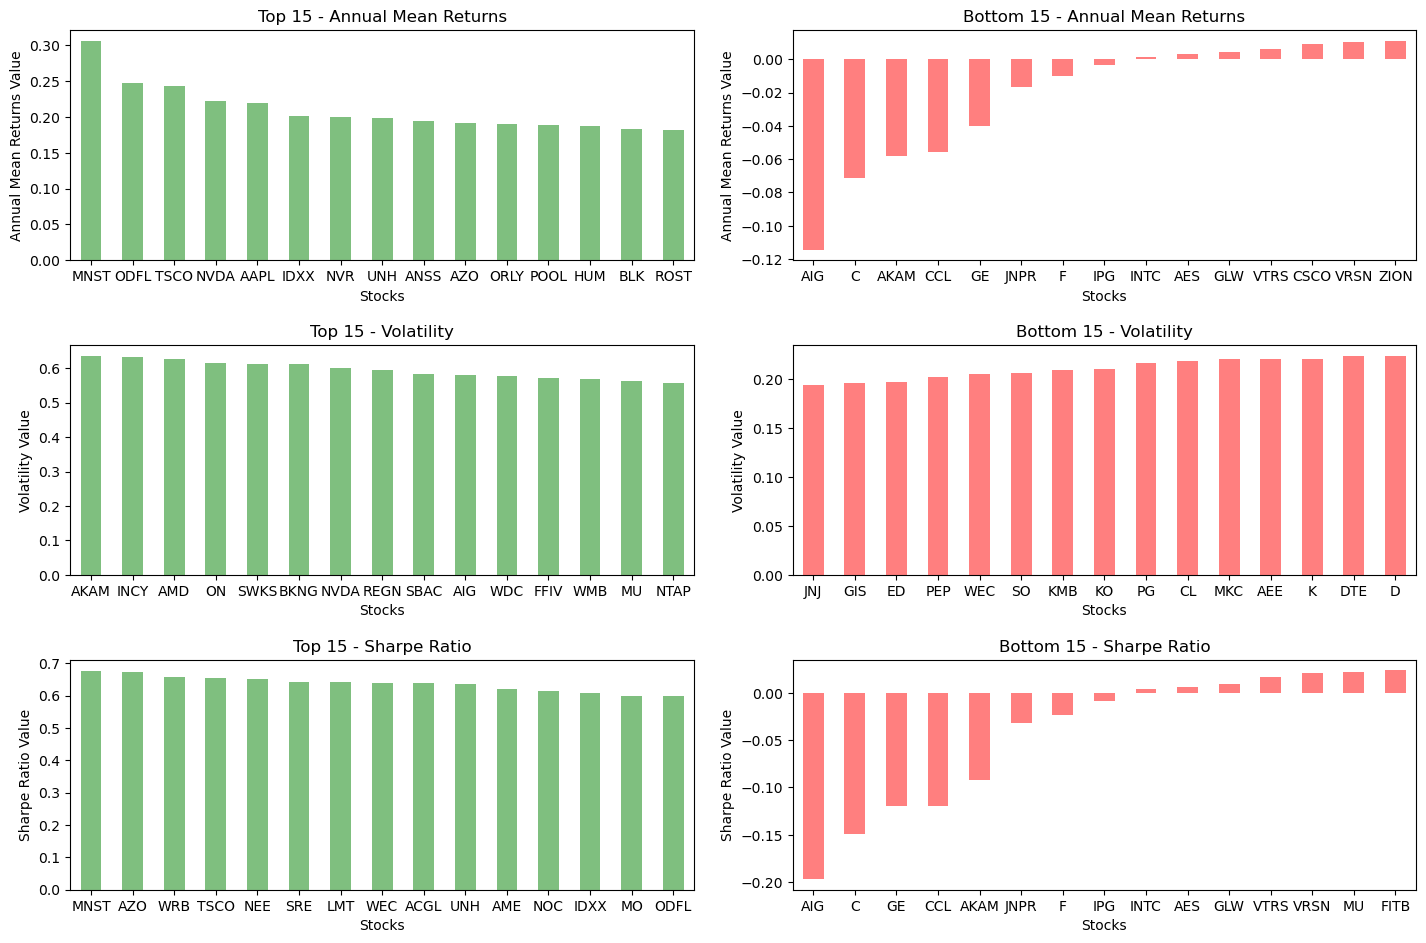

In [17]:
'''
Graphical comparison of the features of the top 15 and bottom 15 stocks of the S&P500. 
'''

list_indices = [0,1,2]
number_top_bottom = 15

fig, axs = plt.subplots(3, 2, figsize = (15, 10))
fig.tight_layout(pad = 4.0)

for column_name, i in zip(measures.columns, list_indices) :
    #Select the 15 largest stocks
    measures[column_name].nlargest(number_top_bottom).plot(kind = "bar", rot = 0, ax = axs[i,0], alpha = 0.5, color = "green")
    axs[i,0].set_title("Top " + str(number_top_bottom) + " - " + column_name)
    axs[i,0].set_xlabel("Stocks")
    axs[i,0].set_ylabel(column_name + " Value")

    #Select the 15 smallest stocks
    measures[column_name].nsmallest(number_top_bottom).plot(kind = "bar", rot = 0, ax = axs[i,1], alpha = 0.5, color = "red")
    axs[i,1].set_title("Bottom " + str(number_top_bottom) + " - " +column_name)
    axs[i,1].set_xlabel("Stocks")
    axs[i,1].set_ylabel(column_name + " Value")

#### Q3.1 Would it make sense to choose portfolio weights based only on the Sharpe ratios of the stocks in your dataset? Explain the reasons for your answer

The Sharpe Ratio measures the risk-adjusted performance of a certain stock. It can be a valuable metric to assess and compare stocks in order to build a portfolio.

However, looking only at the individual sharpe ratios does not take into account some other factors to optimise asset allocation such that correlation/covariance between individual stocks. Indeed, we can choose an allocation which will maximise the sharpe ratio of the porfolio without considering the individual sharpe ratio of the assets, but on evaluating how some assets can offset the risk brougth by asset with a better sharpe ratio.

Let's save the data for next time

In [18]:
close_price_focus.to_csv("close_price_focus.csv")
log_returns.to_csv("log_returns.csv")
measures.to_csv("measures.csv")